In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('/content/300_dishes.csv')
df

,Dish Name,Ingredients,Cuisine,Type,Craving Type
0,Butter Chicken,"Chicken, Butter, Cream",North Indian,Curry,Rich
1,Paneer Tikka,"Paneer, Spices, Yogurt",North Indian,Appetizer,Spicy
2,Biryani,"Rice, Meat, Spices",Hyderabadi,Rice,Spicy
3,Samosa,"Potato, Flour, Spices",North Indian,Snack,Spicy
4,Masala Dosa,"Rice Batter, Potato",South Indian,South Indian,Spicy
...,...,...,...,...,...
334,Malabar Chemmeen Biryani,"Rice, Prawns, Spices",Kerala,Rice,Spicy
335,Ambur Mutton Biryani,"Rice, Mutton, Spices",Tamil Nadu,Rice,Spicy
336,Bisi Bele Bath,"Rice, Lentils, Tamarind",Karnataka,Rice,Spicy
337,Pachadi,"Cucumber, Coconut, Yogurt",Kerala,Curry,Savory


In [3]:
df.isna().sum()

,0
Dish Name,0
Ingredients,0
Cuisine,0
Type,0
Craving Type,0


In [4]:
# prompt: there is lot of duplicates in the data

duplicate_rows_df = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicate_rows_df)
df.drop_duplicates(inplace=True)


Duplicate Rows except first occurrence based on all columns are :
              Dish Name                           Ingredients        Cuisine  \
91        Paneer Bhurji                 Paneer, Tomato, Onion   North Indian   
101               Patra  Colocasia Leaves, Gram Flour, Spices       Gujarati   
165          Bhindi Fry                   Okra, Flour, Spices   North Indian   
198          Baida Roti                   Eggs, Flour, Spices        Mughlai   
210             Kharvas       Colostrum Milk, Sugar, Cardamom  Maharashtrian   
213              Chikki                Peanuts, Jaggery, Ghee  Maharashtrian   
247               Patra  Colocasia Leaves, Gram Flour, Spices       Gujarati   
331  Prawn Ularthiyathu                 Prawns, Onion, Spices         Kerala   

          Type Craving Type  
91       Curry       Savory  
101      Snack       Savory  
165  Appetizer       Savory  
198      Snack        Spicy  
210    Dessert        Sweet  
213    Dessert        Sweet  
247

In [5]:
df['Craving Type'].value_counts()

,count
Craving Type,
Spicy,123
Savory,113
Sweet,56
Rich,39


In [6]:
df['Cuisine'].value_counts()

,count
Cuisine,
North Indian,97
South Indian,36
Maharashtrian,20
Kerala,20
Tamil Nadu,18
Mughlai,17
Bengali,16
Andhra,11
Gujarati,10


In [7]:
# prompt: show duplicated records

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


Empty DataFrame
Columns: [Dish Name, Ingredients, Cuisine, Type, Craving Type]
Index: []


In [8]:
# prompt: drop duplicated records

df = df.drop_duplicates()


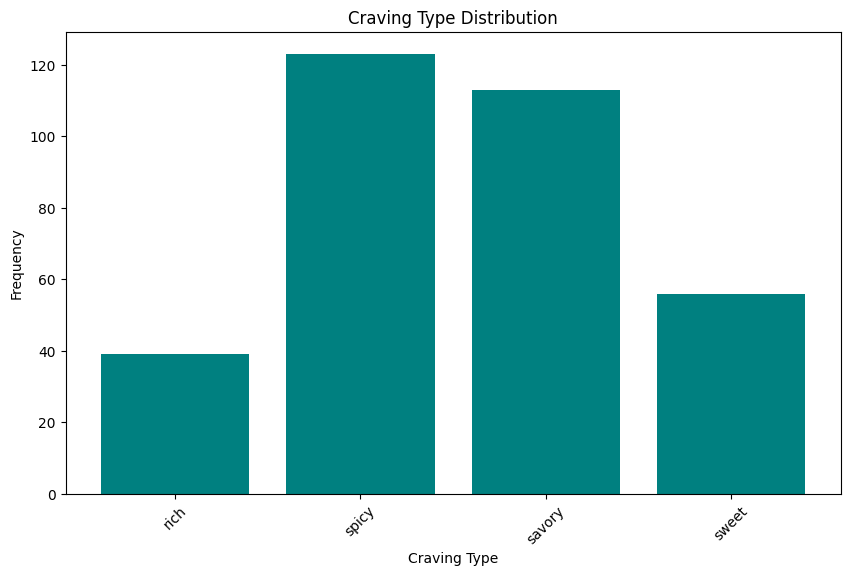

Dish Name       0
Ingredients     0
Cuisine         0
Type            0
Craving Type    0
dtype: int64


,Dish Name,Ingredients,Cuisine,Type,Craving Type
0,Butter Chicken,chicken butter cream,North Indian,curry,rich
1,Paneer Tikka,paneer spice yogurt,North Indian,appetizer,spicy
2,Biryani,rice meat spice,Hyderabadi,rice,spicy
3,Samosa,potato flour spice,North Indian,snack,spicy
4,Masala Dosa,rice batter potato,South Indian,south indian,spicy


In [9]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt




# Load spaCy's English NLP model
nlp = spacy.load('en_core_web_sm')

# Function to normalize text: lowercase, remove stopwords, and lemmatize
def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply normalization and preprocessing to relevant columns
df['Ingredients'] = df['Ingredients'].apply(preprocess_text)
df['Type']= df['Type'].apply(preprocess_text)
df['Craving Type'] = df['Craving Type'].apply(preprocess_text)

# Visualize the distribution of craving types
craving_counts = Counter(df['Craving Type'])

# Plotting the craving distribution
plt.figure(figsize=(10,6))
plt.bar(craving_counts.keys(), craving_counts.values(), color='teal')
plt.xlabel('Craving Type')
plt.ylabel('Frequency')
plt.title('Craving Type Distribution')
plt.xticks(rotation=45)
plt.show()

# Checking for any null values (if any remain)
print(df.isnull().sum())

# Display the first few rows of the updated dataset
df.head()


In [10]:
# prompt: print unique words in ingridients

from collections import Counter

# Combine all ingredients into a single string
all_ingredients = ' '.join(df['Ingredients'].tolist())

# Create a Counter object to count the frequency of each word
word_counts = Counter(all_ingredients.split())

# Get the unique words
unique_words = set(all_ingredients.split())

# Print the unique words in the ingredients
print(unique_words)


{'cream', 'crispie', 'palm', 'beetroot', 'masala', 'point', 'semolina', 'pepper', 'cheese', 'duck', 'chunk', 'jackfruit', 'dumpling', 'egg', 'meat', 'banana', 'vegetable', 'radish', 'butter', 'puff', 'tender', 'gram', 'chickpea', 'yeast', 'milk', 'kidney', 'sauce', 'brinjal', 'green', 'red', 'chana', 'horse', 'pineapple', 'crumb', 'shallot', 'chicken', 'turkey', 'mince', 'eggs', 'berry', 'spinach', 'syrup', 'leg', 'saffron', 'squash', 'goat', 'roselle', 'charcoal', 'chutney', 'lamb', 'shred', 'beef', 'prawn', 'paneer', 'herb', 'capsicum', 'fruit', 'bitter', 'chilie', 'fenugreek', 'cardamom', 'cucumber', 'tapioca', 'urad', 'coriander', 'almond', 'turnip', 'pea', 'wing', 'flower', 'papaya', 'spicy', 'onion', 'corn', 'turmeric', 'flatten', 'sev', 'fish', 'raw', 'vada', 'batter', 'split', 'moong', 'ginger', 'roasted', 'lentil', 'okra', 'roll', 'flour', 'sugar', 'stem', 'tempeh', 'lotus', 'ghee', 'mutton', 'dal', 'nut', 'bean', 'colocasia', 'gum', 'ragi', 'buckwheat', 'tomato', 'liver', 'dr

In [11]:
df['Cuisine'].value_counts()

,count
Cuisine,
North Indian,97
South Indian,36
Maharashtrian,20
Kerala,20
Tamil Nadu,18
Mughlai,17
Bengali,16
Andhra,11
Gujarati,10


In [12]:
import spacy

# Load spaCy's English NLP model
nlp = spacy.load('en_core_web_sm')

# Define lists of craving, ingredient, type, and cuisine keywords
craving_keywords = ["spicy", "sweet", "savory", "rich"]
ingredient_keywords = {
    'ragi', 'radish', 'spinach', 'sauce', 'split', 'roll', 'fish', 'duck', 'water', 'urad', 'ivy',
    'cashew', 'wheat', 'cardamom', 'bread', 'cheese', 'banana', 'semolina', 'pumpkin', 'seed',
    'stem', 'jaggery', 'leaf', 'mix', 'chutney', 'lentil', 'soy', 'sev', 'sprout', 'colostrum',
    'mince', 'yeast', 'okra', 'pea', 'tomato', 'capsicum', 'spice', 'vinegar', 'kidney', 'onion',
    'oil', 'batter', 'chicken', 'ghee', 'edible', 'cauliflower', 'lotus', 'meat', 'poppy', 'wing',
    'syrup', 'buckwheat', 'potato', 'chickpea', 'peanut', 'gum', 'black', 'bitter', 'chickpeas',
    'egg', 'mushroom', 'coriander', 'roasted', 'eggplant', 'colocasia', 'pav', 'nut', 'bombay',
    'fill', 'tamarind', 'mutton', 'crispie', 'mustard', 'crumb', 'ball', 'milk', 'flatten', 'eggs',
    'rice', 'vegetable', 'bean', 'coconut', 'gourd', 'moong', 'puff', 'paneer', 'fruit', 'salt',
    'dry', 'gram', 'yogurt', 'flour', 'pomfret', 'pistachio', 'prawn', 'kulcha', 'tapioca',
    'cream', 'mixed', 'saffron', 'butter', 'leave', 'dal', 'sugar', 'pepper', 'solid',
    'fenugreek', 'beetroot', 'herb', 'carrot', 'green'
}
type_keywords = ["curry", "dessert", "snack", "bread", "appetizer", "soup", "beverage", "rice"]
cuisine_keywords = {
    'north indian', 'south indian', 'maharashtrian', 'kerala', 'tamil nadu', 'mughlai', 'bengali',
    'andhra', 'gujarati', 'goan', 'punjabi', 'rajasthani', 'kashmiri', 'hyderabadi', 'bihari',
    'chettinad', 'parsi', 'karnataka', 'indo-chinese', 'mumbai street food', 'oriya',
    'mangalorean', 'sindhi', 'assamese', 'kolhapuri', 'north eastern', 'madhya pradesh',
    'malwani', 'tibetan', 'jharkhand', 'konkani', 'indonesian', 'nagpur'
}



In [13]:


def extract_features(user_input):
    doc = nlp(user_input.lower())

    # Extract individual tokens
    cravings = [token.text for token in doc if token.text in craving_keywords]
    ingredients = [token.text for token in doc if token.text in ingredient_keywords]
    types = [token.text for token in doc if token.text in type_keywords]

    # Extract cuisines by checking for phrases
    text = user_input.lower()
    cuisines = [cuisine for cuisine in cuisine_keywords if cuisine in text]

    # Return results with default values if no matches are found
    craving_result = cravings if cravings else ["no craving detected"]
    ingredient_result = ingredients if ingredients else ["no ingredient detected"]
    type_result = types if types else ["no type detected"]
    cuisine_result = cuisines if cuisines else ["no cuisine detected"]

    return craving_result, ingredient_result, type_result, cuisine_result


In [14]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity # Import cosine_similarity


# Load spaCy's English NLP model
nlp = spacy.load('en_core_web_sm')

# ... (rest of your code) ...

In [20]:
# Combining relevant text columns into one for better matching
df['combined_features'] = df['Ingredients'] + " " + df['Craving Type'] + " " + df['Cuisine']

# Create the TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the 'combined_features' column
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Function to get craving-based recommendations
def recommend_food(user_input, df, tfidf_matrix):
    # Extract features from user input
    cravings, ingredients, types, cuisines = extract_features(user_input)
    print(f"Extracted features:\nCravings: {cravings}\nIngredients: {ingredients}\nTypes: {types}\nCuisines: {cuisines}")

    # Combine all extracted features into a single string for better matching
    user_features = " ".join(cravings + ingredients + types + cuisines)

    # Transform the user's input into the same TF-IDF space
    user_tfidf = tfidf.transform([user_features])

    # Calculate cosine similarity between user input and the food items
    cosine_sim = cosine_similarity(user_tfidf, tfidf_matrix)

    # Get the top 5 most similar food items based on cosine similarity
    top_indices = cosine_sim.argsort()[0][-3:][::-1]
    recommendations = df.iloc[top_indices]

    # Sort the recommendations by User Feedback to provide better-rated suggestions
    if "User Feedback" in df.columns:
        recommendations = recommendations.sort_values(by="User Feedback", ascending=False)

    return recommendations

# Example user input
user_input = "I'm craving something sweet south indian"
recommendations = recommend_food(user_input, df, tfidf_matrix)

# Display top recommendations
print(recommendations)

Extracted features:
Cravings: ['sweet']
Ingredients: ['no ingredient detected']
Types: ['no type detected']
Cuisines: ['south indian']
         Dish Name            Ingredients       Cuisine     Type Craving Type  \
128  Coconut Ladoo     coconut milk sugar  South Indian  dessert        sweet   
257   Banana Bonda     banana flour spice  South Indian    snack        sweet   
48      Mysore Pak  gram flour ghee sugar  South Indian  dessert        sweet   

                            combined_features  
128     coconut milk sugar sweet South Indian  
257     banana flour spice sweet South Indian  
48   gram flour ghee sugar sweet South Indian  
